# CryptoPETS

PETS is the characters set used by early Commodore computers e.g. the Commodore C64. It is comfortingly familiar to the elder millenials 

In [47]:
import hashlib
import json
import numpy as np
import pickle
import random


In [2]:
import sys
sys.path.append('..')
sys.path.append('/home/tnn1t1s/art/cpunks-10k')
import matplotlib.pyplot as plt
import cpunks.cpunks10k as cpunks10k
import cryptopunks.utils as cp
%matplotlib inline

In [6]:
data_dir="/home/tnn1t1s/art/colorpunx/cryptopunks/data"
_colors = None
_imgmap = None

with open(f"{data_dir}/_colors_count.pickle", 'rb') as f:
    _colors = pickle.load(f)
sorted_colors=cp.sort_dict_by_function_of_value(_colors)

In [9]:
d={}
i=1
for k in sorted_colors.keys():
    hexkey = cp.color_str_to_hex(k)
    d[hexkey]={
        'original_key': k,
        'id': i,
        'name': hexkey,
        'description': f"{hexkey} is one of 222 colors in the cryptopunx color pallette. It is used by {len(_colors[k])} unique punks",
        'punks': _colors[k]
    } 
    #with open(f"{assets_dir}/json/colorpunx{i}.json", "w") as outfile:
    #     json.dump(d[hexkey], outfile)
    #mpimg.imsave(f"{assets_dir}/images/colorpunx{i}.png", color_imgs[k])
    i = i + 1

In [10]:
class Colormap:
    def __init__(self, d):
        self.d = {d[k]['original_key'] : d[k]['id'] for k in d.keys()}
        self.d_ = {int(d[k]['id']) : d[k]['original_key'] for k in d.keys()}
        self.d['[0. 0. 0. 0.]'] = 221
        self.d_[221] = '[0. 0. 0. 0.]'
        
    def get_rgbt(self, i):
        return self.d_[i]
    
    def get_id(self, rgbt):
        return self.d[rgbt]

cm = Colormap(d)
(
    cm.get_id('[0.35686275 0.28627452 0.2        1.        ]') == 1,
    cm.get_rgbt(1) == '[0.35686275 0.28627452 0.2        1.        ]' 
)

(True, True)

In [11]:
def one_hot(i,N):
    X = np.zeros(N)
    X[i]=1
    return X

In [12]:
def bloc_party(input_arr, selector):
    return np.block([[selector(i) for i in j] for j in input_arr])

In [13]:
def get_tile_images(image, width=8, height=8):
    _nrows, _ncols, depth = image.shape
    _size = image.size
    _strides = image.strides

    nrows, _m = divmod(_nrows, height)
    ncols, _n = divmod(_ncols, width)
    if _m != 0 or _n != 0:
        return None

    return np.lib.stride_tricks.as_strided(
        np.ravel(image),
        shape=(nrows, ncols, height, width, depth),
        strides=(height * _strides[0], width * _strides[1], *_strides),
        writeable=False
    )

def rgb2gray(rgb):
    weights = [0.2989, 0.5870, 0.1140]
    return np.dot(rgb[...,:3], weights)


In [14]:
import matplotlib.image as mpimg
petscii = mpimg.imread(f"/home/tnn1t1s/Downloads/petscii.png")

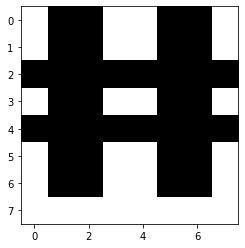

In [25]:
PETS_ = get_tile_images(petscii, width=8, height=8)
PETS_  = PETS_.reshape(280,8,8,4)#.astype(np.uint8)
cmap = plt.get_cmap('gray')

PETS_GRAY = np.array([rgb2gray(img) for img in PETS_])
#PETS_  = PETS_.reshape(280,8,8,4)#.astype(np.uint8)
#plt.imshow(PETS_[163])
#PETS_[163].shape
plt.imshow(PETS_GRAY[163], cmap=cmap)

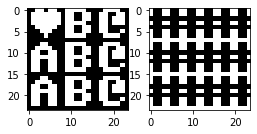

In [26]:
square = np.array([[83, 2, 0],[1, 2, 0], [1, 2, 0]])
all_hash = np.array([[163, 163, 163],[163, 163, 163], [163, 163, 163]])


fig = plt.figure(figsize=(4,8))
fig.add_subplot(1,2, 1)
plt.imshow(bloc_party(square, lambda i: PETS_GRAY[i]), cmap=cmap)
fig.add_subplot(1,2, 2)
plt.imshow(bloc_party(all_hash, lambda i: PETS_GRAY[i]), cmap=cmap)

In [38]:
cpunx = cpunks10k.cpunks10k()
(X_train, Y_train), (X_test, Y_test), (labels) = cpunx.load_data()

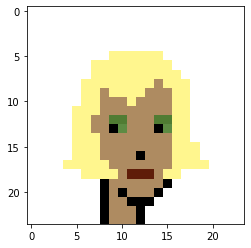

In [28]:
plt.imshow(X_train[0])

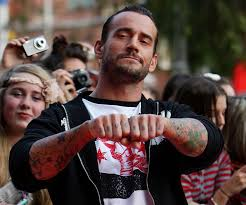

In [32]:
def cm_punk(punk, cm):
    '''convert a (24,24,4) punk to a (24,24) encoded punk using cm'''
    return np.array([[cm.get_id(str(y)) for y in x] for x in punk])


In [44]:
#Y_ = np.array([[cm.get_id(str(y)) for y in x] for x in X_train[0]])
#punk_1 = cm_punk(Y_[0], cm)
#np.unique(punk_1)
X_train_cm = [cm_punk(img, cm) for img in X_train]

In [97]:
# bg 221
# hair 197
# skin 219
# ? 222
# eyes_1 104
# eyes_2 103
# mouth 195
punk_to_c64 = {}
punk_to_c64[221] = 160
punk_to_c64[197] = 163
punk_to_c64[219] = 83
punk_to_c64[222] = 92  #rnd
punk_to_c64[104] = 54
punk_to_c64[103] = 63
punk_to_c64[195] = 90

def p64(i):
    try:
        return PETS_GRAY[punk_to_c64[i]]
    except:
        r = random.randint(10,150)
        punk_to_c64[i] = r
        return PETS_GRAY[r]

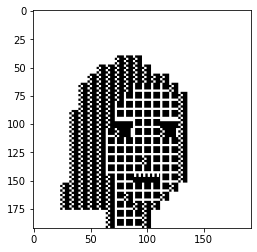

In [98]:
l = bloc_party(X_train_cm[5], lambda i: p64(i))
c64_punks = [bloc_party(X_train_cm[i], lambda x: p64(x)) for i in range(64,128)]
plt.imshow(c64_punks[7], cmap=cmap)

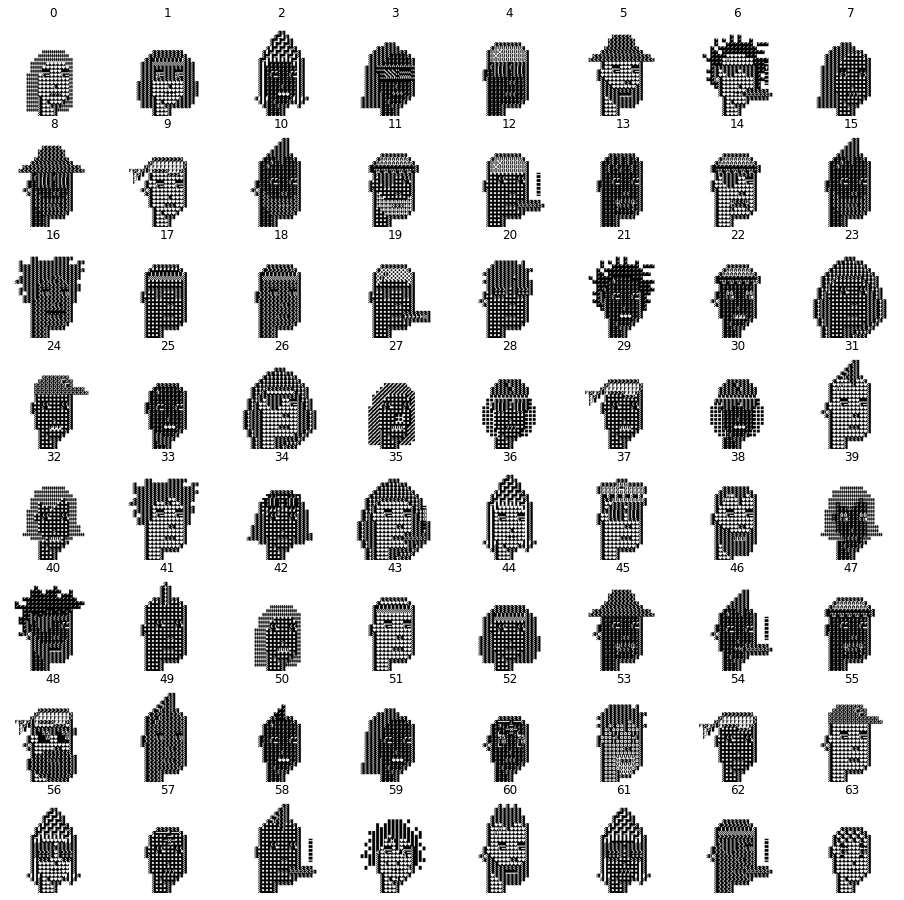

In [89]:
n=8  
(x,y) = (n,n)
# create figure
fig = plt.figure(figsize=(x*2,y*2))


for i in range(0,64):
    fig.add_subplot(x, y, i+1)
    plt.imshow(c64_punks[i], cmap=cmap)
    plt.axis('off')
    plt.title(i)